# HW01 - SGD for linear regression
#### Caitlin Curry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

### Dataset

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

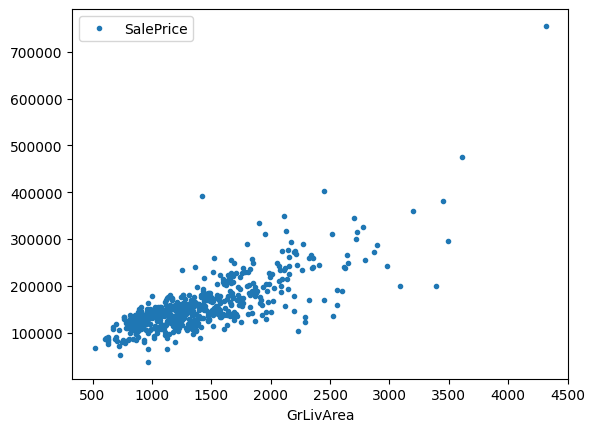

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)
data.plot(x='GrLivArea', y='SalePrice',style='.')

### Theory of linear regression

The slope and intercept of such a line $y = m x + b$ can be found as: 

$$m = { n (\Sigma xy) - (\Sigma x) (\Sigma y) \over n (\Sigma x^2) - (\Sigma x)^2 } $$

$$b = { (\Sigma y) (\Sigma x^2) - (\Sigma x) (\Sigma xy) \over n (\Sigma x^2) - (\Sigma x)^2 } $$

$x$ will be our _above ground square footage_

$y$ will be _sale price_

$n$ is the number of points we have:

In [3]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [4]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

denominator = n * sum_x2 - sum_x * sum_x

m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [5]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

### Training through Stochastic Gradient Descent (SGD)

#### The model

$$ \hat{y_i}(x_i) = m * x_i + b $$

In [6]:
def model(x,m,b):
   return m * x + b


#### The Loss Function

$$ L(y_i,\hat{y_i}) = (y_i - \hat{y_i}(x_i))^2 $$

In [7]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

#### Minimizing the Loss Function

$$ { \partial L \over \partial m } = 0 $$

$$ { \partial L \over \partial m } = -2 x_i (y_i - \hat{y_i}(x_i)) $$
$$ { \partial L \over \partial b } = -2 (y_i - \hat{y_i}(x_i)) $$

$$ m' = m - \eta { \partial L \over \partial m }$$
$$ b' = b - \eta { \partial L \over \partial b }$$

$\eta$, the _learning rate_, essentially defines how close we can get to the minimum, AKA the best fit solution. 

In [8]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

[029]  dy_i = 88.89 * x + 32912.24     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


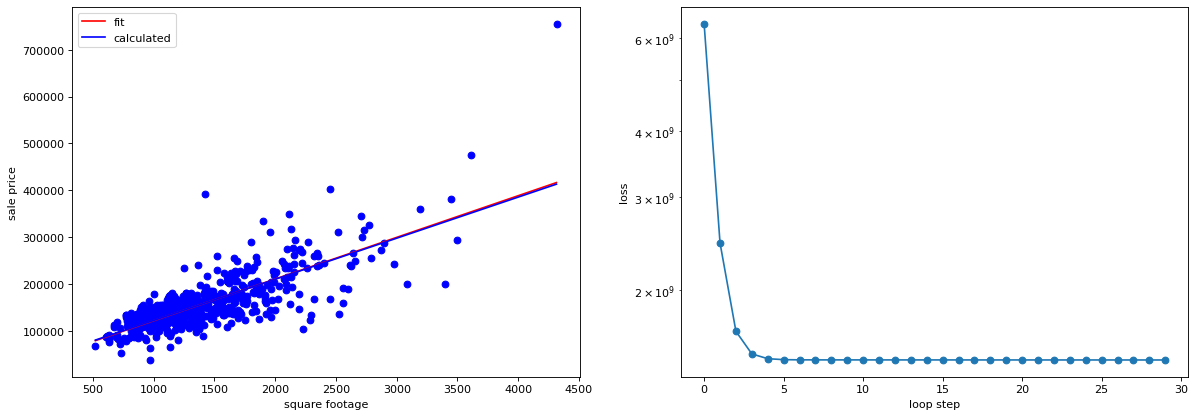

In [9]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)



# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like 
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use 
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*len(data)//batch_size
```

Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512. 

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge. 
```
(64, 1e-7, 1e-1)*1
(64, 1e-7, 1e-1)*2
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*8
...
```

**How to submit your homework**
* Fork the github repo to your personal github 
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github. 

Follow the below instruction on how to do this: 
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md

### a) Mini Batches

batch size: 32     [1720]  dy_i = 86.91 * x + 32340.08     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1480602936.503484


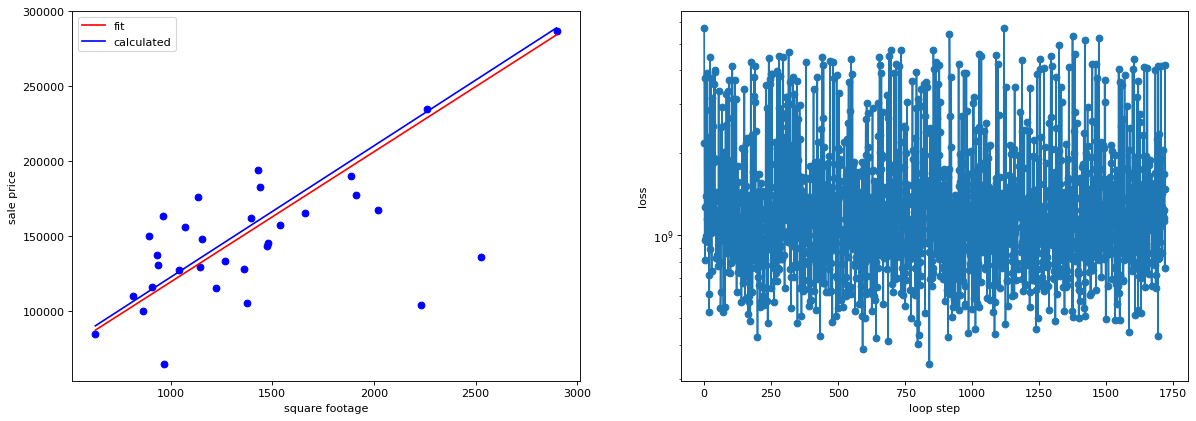

batch size: 64     [859]  dy_i = 90.46 * x + 32027.58     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1249032437.035330


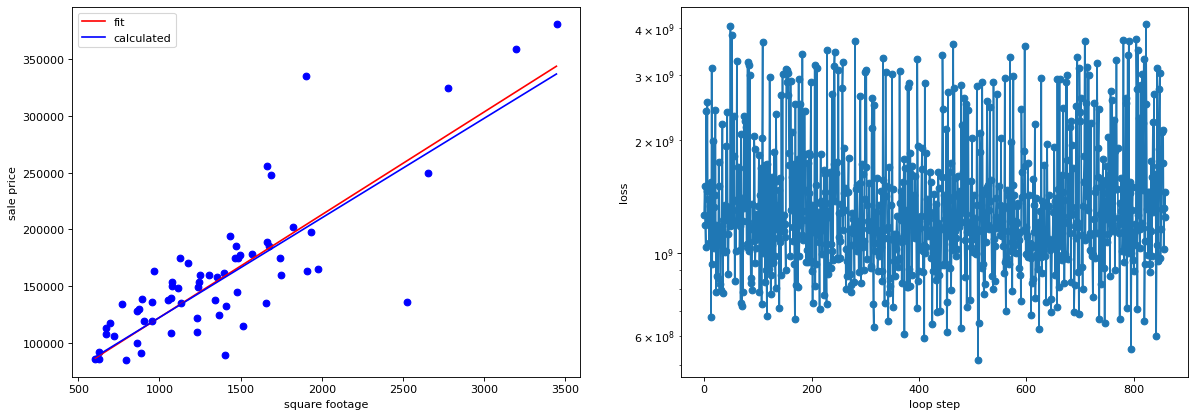

batch size: 128     [429]  dy_i = 84.14 * x + 38012.74     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1126209996.151814


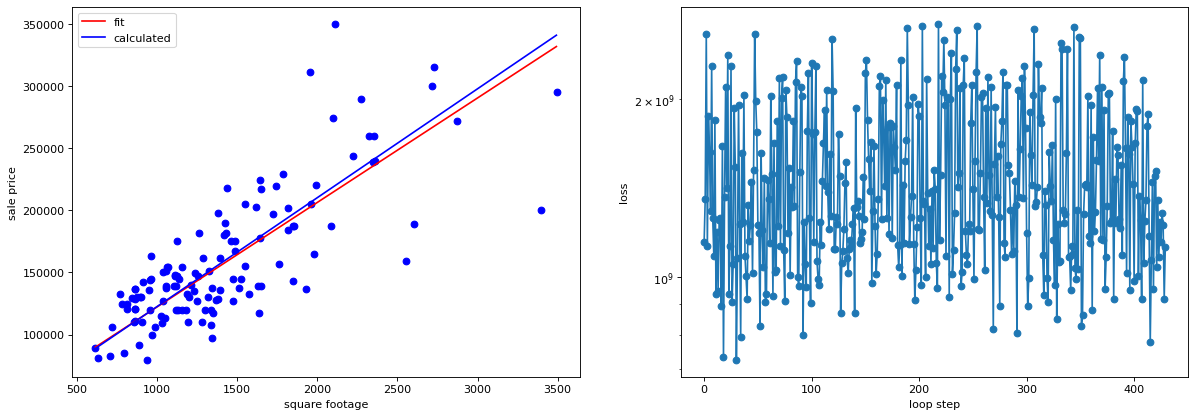

batch size: 512     [106]  dy_i = 87.62 * x + 35012.39     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1502043908.285316


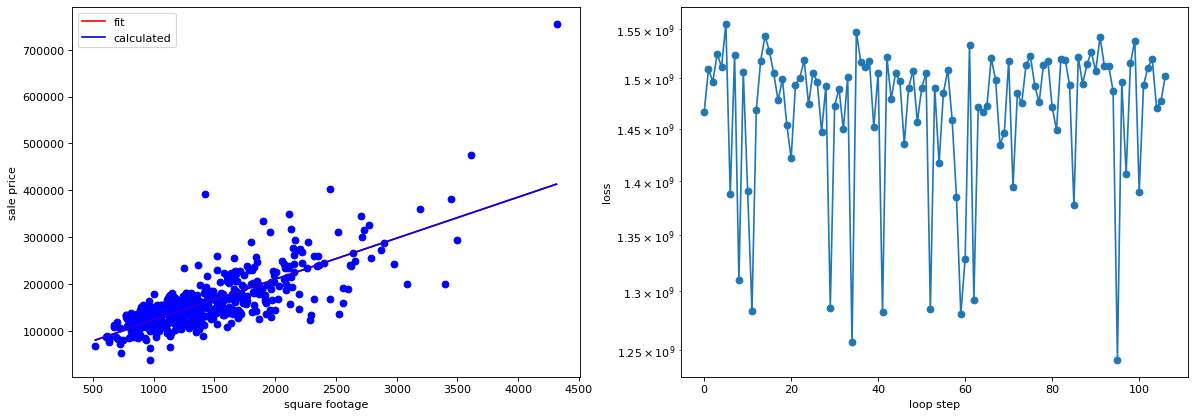

In [10]:
# set our initial slope and intercept
m = 5.
b = 1000.

# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1

batch_sizes=[32,64,128,512]

n_full_passes=100

loss_histories=[]

batch_sizes=[32,64,128,512]

for i_batch, batch_size in enumerate(batch_sizes):
   loop_N = n_full_passes*len(data)//batch_size
   loss_history = []
   for i in range(loop_N):
      # random sample of size batch_size of dataframe
      data_batch = data.sample(batch_size)
      data_x = data_batch['GrLivArea'].to_numpy()
      data_y = data_batch['SalePrice'].to_numpy()

      # update our slope and intercept based on the current values
      m = updated_m(data_x,data_y,m,b,learning_rate_m)
      b = updated_b(data_x,data_y,m,b,learning_rate_b)

      # calculate the loss value
      loss_value = np.mean(loss(data_x,data_y,m,b))

      # keep a history of our loss values
      loss_history.append(loss_value)

   # print last iteration
   print('batch size: %.0f     [%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (batch_size,i,m,b,m_calc,b_calc,loss_value))
      
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()

   loss_histories.append(loss_history)

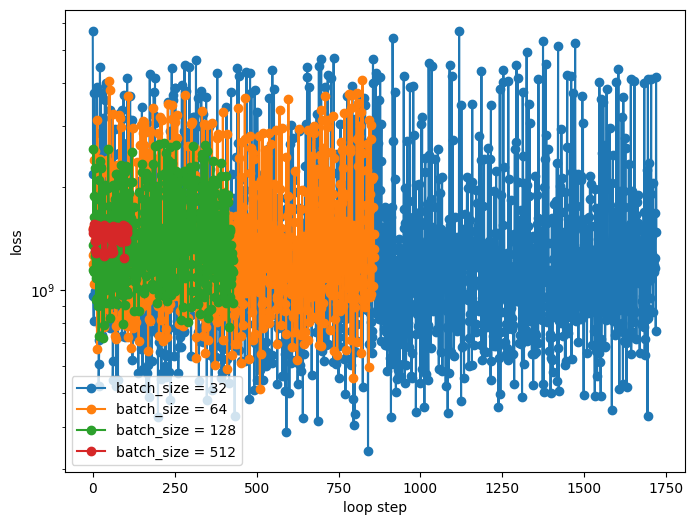

In [11]:
# plot the loss
plt.figure(figsize=(8,6))
for i_batch, batch_size in enumerate(batch_sizes):

    loss_history = loss_histories[i_batch]
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)

    plt.plot(loss_x,loss_y, 'o-', label='batch_size = '+str(batch_size))
    plt.yscale('log')
    plt.xlabel('loop step')
    plt.ylabel('loss')
    plt.legend()

plt.show()

### b) Learning Rate

[64, 0.0000001, 0.1]     [257]  dy_i = 87.69 * x + 37762.39     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1140786792.505308


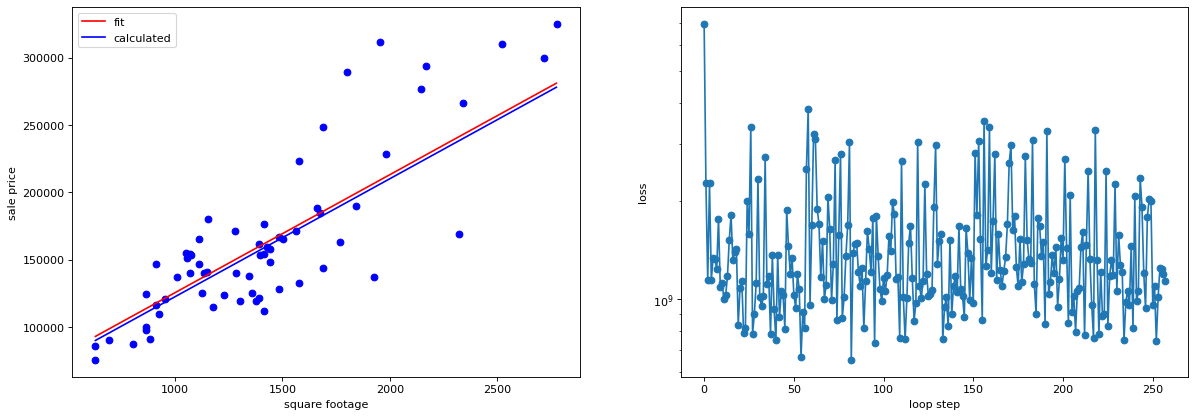

[128, 0.0000002, 0.2]     [128]  dy_i = 93.96 * x + 32737.45     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1088988012.255298


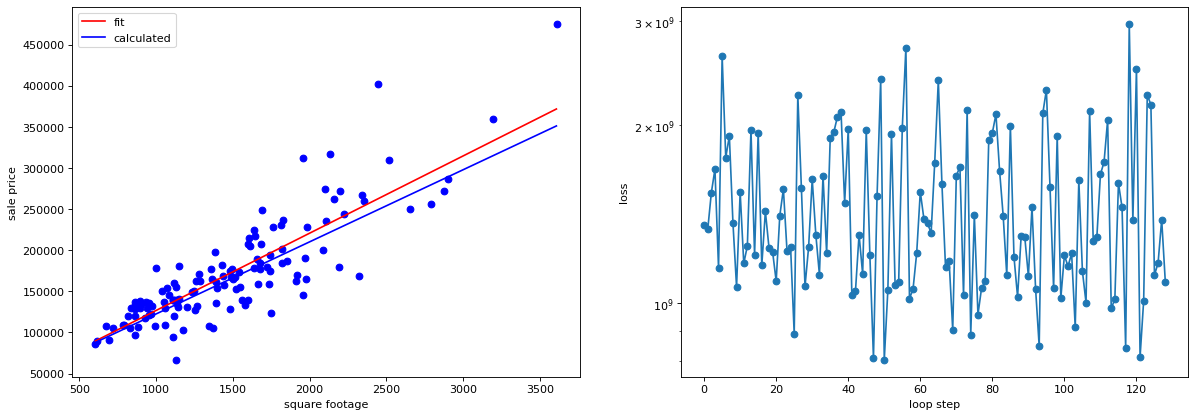

[256, 0.0000004, 0.4]     [063]  dy_i = 90.83 * x + 30371.72     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1554352450.277113


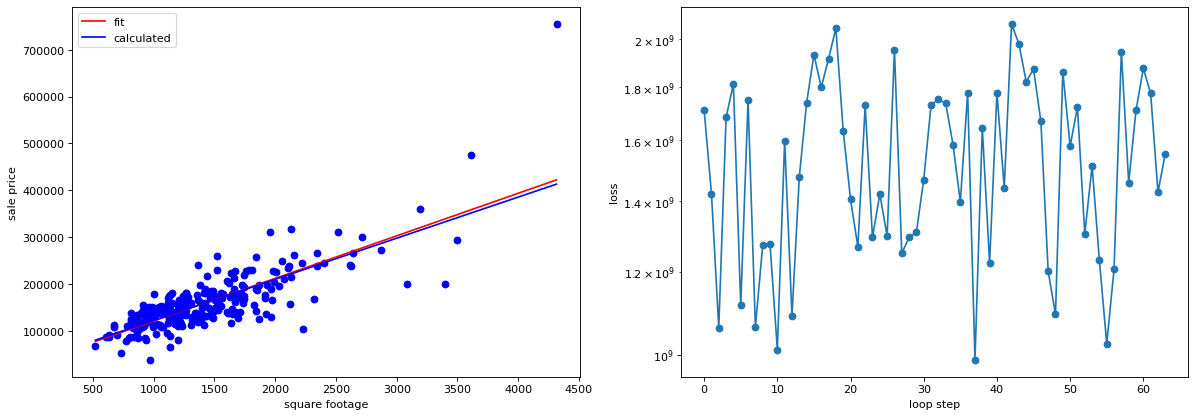

[512, 0.0000008, 0.8]     [031]  dy_i = 570.61 * x + -2032317.52     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1994619735410.770020


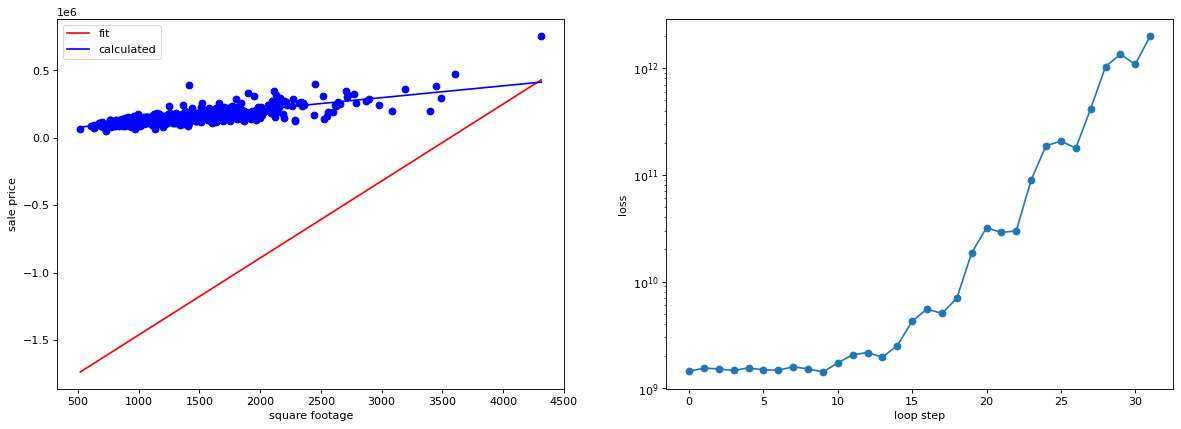

In [12]:
# set our initial slope and intercept
m = 5.
b = 1000.
hyper_parameters_base = [64, 1e-7, 1e-1]
n_full_passes=30
loss_histories=[]


for factor in [1,2,4,8]:
    hyper_parameters = [x * factor for x in hyper_parameters_base]
    batch_size = hyper_parameters[0]
    learning_rate_m = hyper_parameters[1]
    learning_rate_b = hyper_parameters[2]
   
    loss_history = []
    loop_N = n_full_passes*len(data)//batch_size
    for i in range(loop_N):
      # random sample of size batch_size of dataframe
      data_batch = data.sample(batch_size)
      data_x = data_batch['GrLivArea'].to_numpy()
      data_y = data_batch['SalePrice'].to_numpy()

      # update our slope and intercept based on the current values
      m = updated_m(data_x,data_y,m,b,learning_rate_m)
      b = updated_b(data_x,data_y,m,b,learning_rate_b)

      # calculate the loss value
      loss_value = np.mean(loss(data_x,data_y,m,b))

      # keep a history of our loss values
      loss_history.append(loss_value)

    print('[%.0f, %.7f, %.01f]     [%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (batch_size, learning_rate_m, learning_rate_b,i,m,b,m_calc,b_calc,loss_value))

    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()


    loss_histories.append(loss_history)

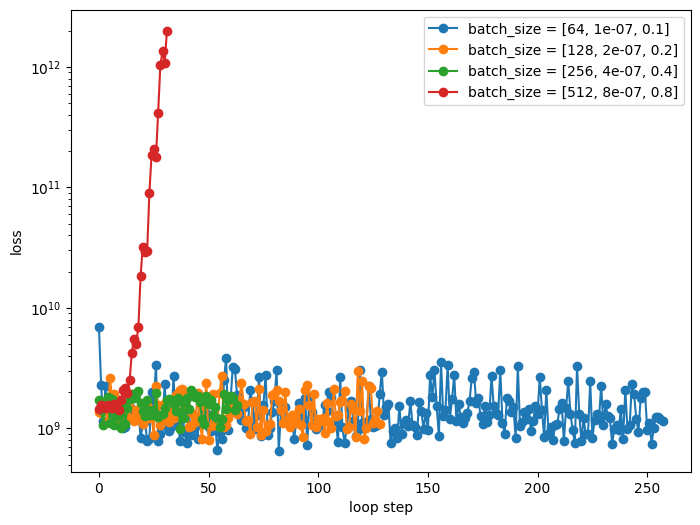

In [13]:
# plot the loss
plt.figure(figsize=(8,6))

for j,factor in enumerate([1,2,4,8]):
    hyper_parameters = [x * factor for x in hyper_parameters_base]
    loss_history = loss_histories[j]
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)

    plt.plot(loss_x,loss_y, 'o-', label='batch_size = '+str(hyper_parameters))
    plt.yscale('log')
    plt.xlabel('loop step')
    plt.ylabel('loss')
    plt.legend()

plt.show()

With batch_size=512 and learning rates of 8e-7 and 0.8, training does not converge.